<a href="https://colab.research.google.com/github/tanhata/ig_usergrowth/blob/main/Geo_Targeted_IG_Advertising_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas numpy kaggle

Instagram User Growth by Country

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arpitsinghaiml/instagram-user-growth-by-country")
print("Path to dataset files:", path)

100%|██████████| 3.85k/3.85k [00:00<00:00, 3.48MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arpitsinghaiml/instagram-user-growth-by-country/versions/1


In [7]:
import pandas as pd

# Read the CSV file
df_ig = pd.read_csv(path + "/instagram-users-by-country-2024.csv")

# Display the first few rows
print(df_ig.head())

         country  InstagramUsers_2024  InstagramUsers_PctFemale_2024  \
0          India          392465000.0                           33.1   
1  United States          172606200.0                           55.4   
2      Indonesia           90183200.0                           54.2   
3       Pakistan           18593301.0                           35.1   
4        Nigeria           12635900.0                           46.5   

   InstagramUsers_PctMale_2024  InstagramUsers2023  
0                         66.9           229600000  
1                         44.6           143400000  
2                         45.8            89150000  
3                         64.9            12950000  
4                         53.5             7100000  


In [8]:
df_ig['GrowthRate'] = (df_ig['InstagramUsers_2024'] - df_ig['InstagramUsers2023']) / df_ig['InstagramUsers2023']

In [9]:
top_10 = df_ig.nlargest(10, 'GrowthRate')[['country', 'InstagramUsers_2024', 'GrowthRate']]
print(top_10)

             country  InstagramUsers_2024   GrowthRate
5             Brazil          141408300.0  1244.888106
124          Eritrea               9500.0     2.454545
32             Yemen            1737900.0     1.806686
38        Uzbekistan            9427600.0     1.244667
31       Afghanistan            1240400.0     1.244255
157  Solomon Islands              12000.0     1.000000
83        Tajikistan            1568800.0     0.954160
46             Nepal            4143000.0     0.926977
7           Ethiopia            1105800.0     0.805977
4            Nigeria           12635900.0     0.779704


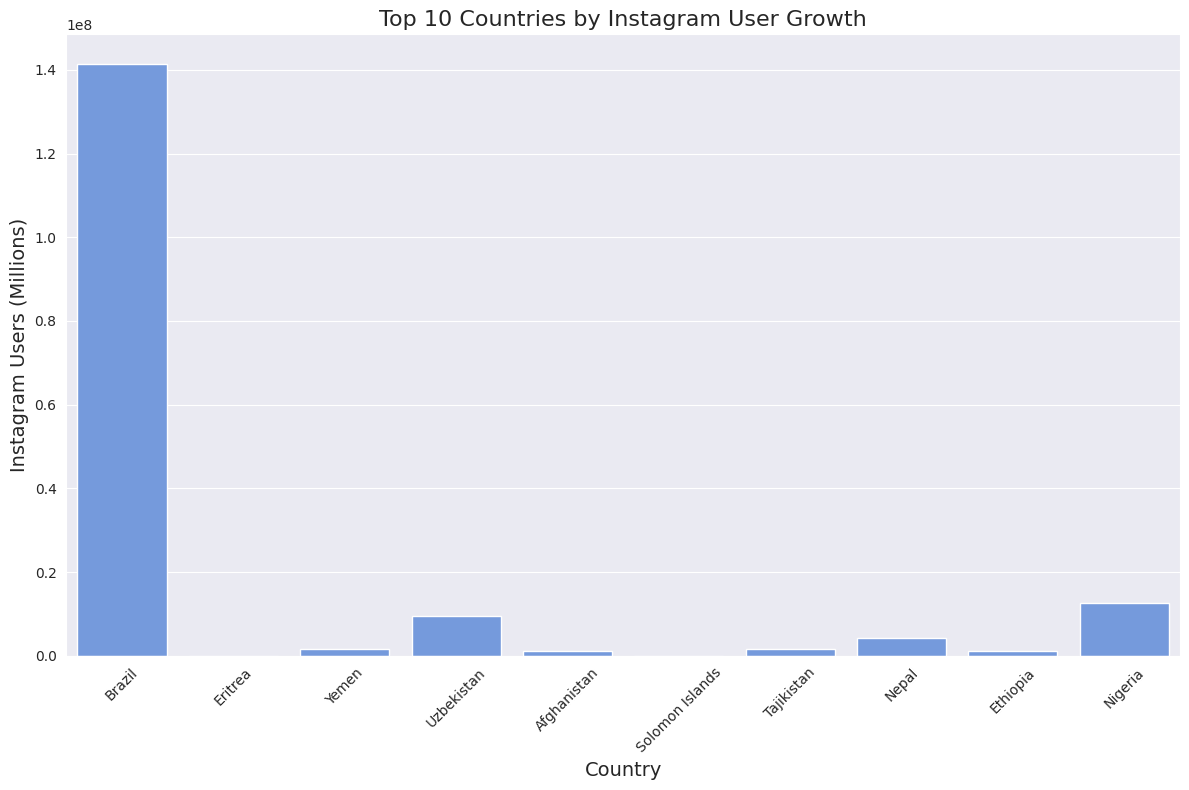

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

plt.figure(figsize=(12,8))
sns.barplot(x=top_10['country'], y=top_10['InstagramUsers_2024'], color='#6495ED')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Instagram Users (Millions)', fontsize=14)
plt.title('Top 10 Countries by Instagram User Growth', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
import plotly.express as px

fig = px.bar(top_10, x='country', y='InstagramUsers_2024',
             color_discrete_sequence=['#6495ED'],
             template='plotly_white')
fig.update_layout(
    title='Top 10 Countries by Instagram User Growth',
    xaxis_title='Country',
    yaxis_title='Instagram Users (Millions)',
    font_size=14
)
fig.show()

In [7]:
budget = {
    'India': 0.4,
    'United States': 0.3,
    'Indonesia': 0.3
}

campaigns = [
    {'Country': 'India', 'Target Audience': '18-34', 'Industry': 'Fashion'},
    {'Country': 'United States', 'Target Audience': '25-45', 'Industry': 'Travel'}
]

print("\nBudget Allocation:")
for country, allocation in budget.items():
    print(f"{country}: {allocation*100}%")

print("\nTargeted Advertising Campaigns:")
for campaign in campaigns:
    print(f"Country: {campaign['Country']}, Target Audience: {campaign['Target Audience']}, Industry: {campaign['Industry']}")


Budget Allocation:
India: 40.0%
United States: 30.0%
Indonesia: 30.0%

Targeted Advertising Campaigns:
Country: India, Target Audience: 18-34, Industry: Fashion
Country: United States, Target Audience: 25-45, Industry: Travel


Linear Regression


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features (X) and target (y)
df_ig.dropna(inplace=True)
X = df_ig[['InstagramUsers2023', 'InstagramUsers_PctFemale_2024']]
y = df_ig['InstagramUsers_2024']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Coefficients
print(model.coef_)

Mean Squared Error: 6793669816626.955
[ 1.48426317e+00 -5.71754219e+04]


Polynomial Regression


In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Define features (X) and target (y)
X = df_ig[['InstagramUsers2023']]
y = df_ig['InstagramUsers_2024']

# Polynomial features
poly_features = PolynomialFeatures(degree=2)

# Transform features
X_poly = poly_features.fit_transform(X)

# Train polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Coefficients
print(model.coef_)

[0.00000000e+00 8.58438209e-01 3.47863949e-09]


Ridge

In [18]:
from sklearn.linear_model import Ridge

# Define features (X) and target (y)
X = df_ig[['InstagramUsers2023', 'InstagramUsers_PctFemale_2024']]
y = df_ig['InstagramUsers_2024']

# Train Ridge regression model
model = Ridge(alpha=0.5)
model.fit(X, y)

# Coefficients
print(model.coef_)

[ 1.47503411e+00 -5.99547721e+04]


Lasso

In [19]:
from sklearn.linear_model import Lasso

# Define features (X) and target (y)
X = df_ig[['InstagramUsers2023', 'InstagramUsers_PctFemale_2024']]
y = df_ig['InstagramUsers_2024']

# Train Lasso regression model
model = Lasso(alpha=0.01)
model.fit(X, y)

# Coefficients
print(model.coef_)

[ 1.47503409e+00 -5.99564920e+04]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.115e+14, tolerance: 2.187e+13
  model = cd_fast.enet_coordinate_descent(


Elastic Net

In [20]:
from sklearn.linear_model import ElasticNet

# Define features (X) and target (y)
X = df_ig[['InstagramUsers2023', 'InstagramUsers_PctFemale_2024']]
y = df_ig['InstagramUsers_2024']

# Train Elastic Net regression model
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X, y)

# Coefficients
print(model.coef_)

[ 1.47503413e+00 -5.99529660e+04]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e+16, tolerance: 2.187e+13
  model = cd_fast.enet_coordinate_descent(


# Hyperparameter Tuning

Multi Linear Regression

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Define hyperparameter grid
param_grid = {
    'linear_regression__fit_intercept': [True, False]
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Best score
print(grid_search.best_score_)
print(grid_search.best_score_)

{'linear_regression__fit_intercept': True}
0.6841089628087133
0.6841089628087133


Ridge

In [24]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1, 5, 10],
    'fit_intercept': [True, False]
}

# Grid search
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Best score
print(grid_search.best_score_)

{'alpha': 10, 'fit_intercept': False}
0.6870623358583592


Lasso

In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 5, 10],
    'fit_intercept': [True, False]
}

# Grid search
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Best score
print(grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.758e+15, tolerance: 1.930e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+16, tolerance: 2.044e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.883e+15, tolerance: 2.071e

{'alpha': 10, 'fit_intercept': False}
0.6870621049172981


Elastic Net

In [26]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 5, 10],
    'l1_ratio': [0.2, 0.5, 0.8],
    'fit_intercept': [True, False]
}

# Grid search
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Best score
print(grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.816e+14, tolerance: 1.930e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+16, tolerance: 2.044e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.807e+15, tolerance: 6.359e

{'alpha': 10, 'fit_intercept': False, 'l1_ratio': 0.2}
0.6870863299788107


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.390e+13, tolerance: 1.950e+13
  model = cd_fast.enet_coordinate_descent(


Feature Engineering

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

interaction_terms = PolynomialFeatures(degree=2, interaction_only=True)
X_interaction = interaction_terms.fit_transform(X_train)

In [30]:
import numpy as np

X_log = np.log(X_train)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

poly_model.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])